<a href="https://colab.research.google.com/github/Lucas-Souza21/TP547-LucasSSouza/blob/main/ModulacaoEDemodulacao4PAMLucasSouza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Inicialização das Bibliotecas

In [ ]:
!pip install numpy
!pip install matplotlib

Criação do Sinal Modulado por 4PAM


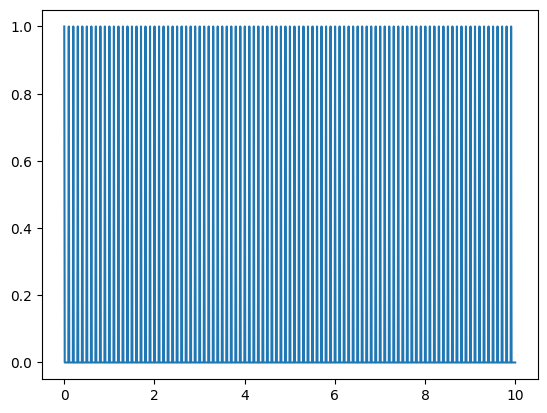

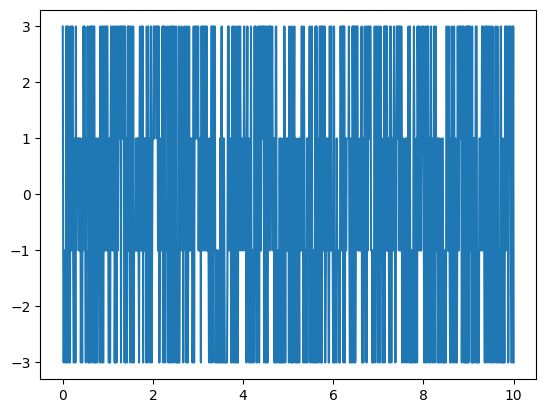

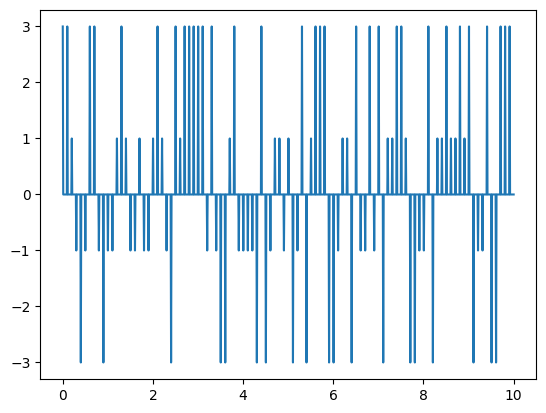

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

espacoTempo = 1000 #Definir espaço de tempo
t = np.linspace(0,10,espacoTempo) #Inicialização do tempo
A = 2 #Amplitude
M = 4 #Modulação
s = np.zeros(M) #Definição inicial para o S
numImp = 100 #Numero de Impulsos

#Criação do Trem de impulsos
intervalo = espacoTempo // numImp
sinal = np.zeros(espacoTempo)
sinal[::intervalo] = 1


for i in np.arange(0,M,1):
  s[i] =  A * (i - ((M-1)/2)) #Troca cada valor de do array

# Gerar sinal PAM
pam = np.random.choice(s, len(t))

signalPAM = sinal * pam

plt.figure(1)
plt.plot(t , sinal)
plt.figure(2)
plt.plot(t , pam)
plt.figure(3)
plt.plot(t , signalPAM)
plt.show()

#print(pam)

Inclusão do Ruído

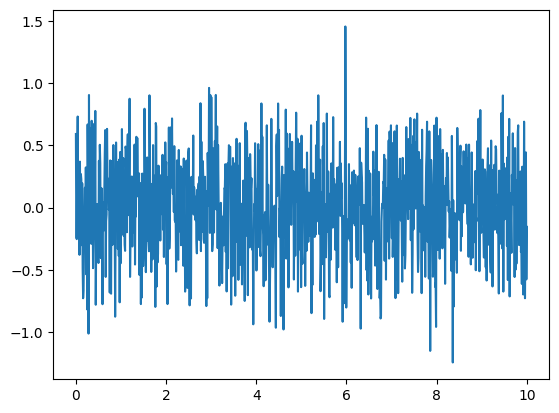

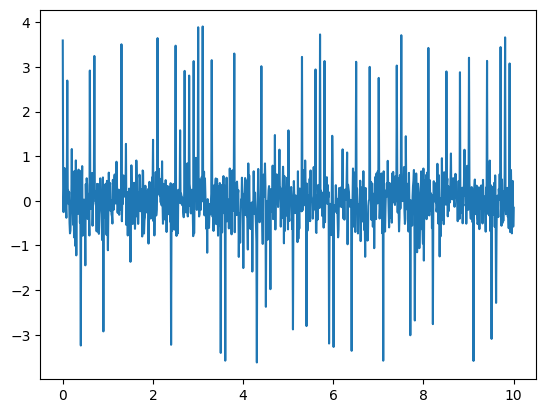

In [ ]:
ampRuido = 0.4
ruido = ampRuido * np.random.randn(espacoTempo)

sinalComRuido = signalPAM + ruido

plt.figure(1)
plt.plot(t , ruido)
plt.figure(2)
plt.plot(t , sinalComRuido)

Decodificação do Sinal 4PAM com Ruído

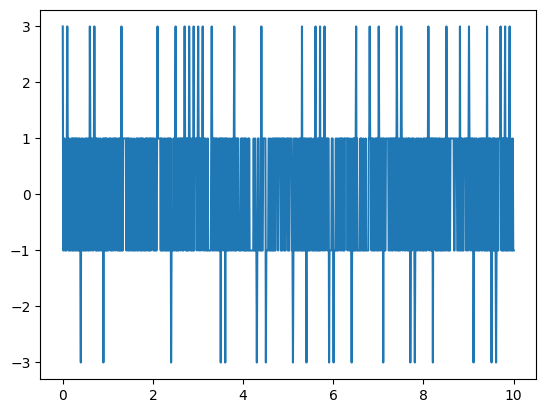

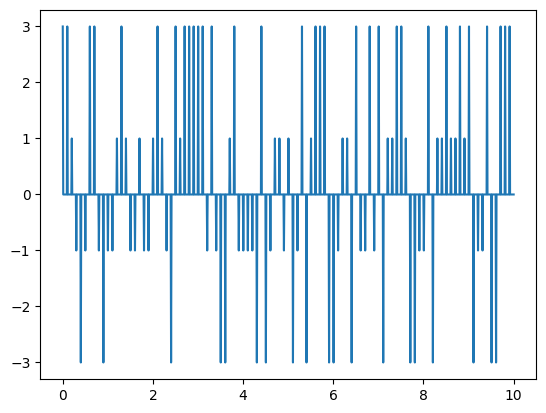

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

limites = [-2 , 0 , 2] #Sinais intermediarios entre -3 , -1 , 1 , 3
PAM = [-3 , -1 , 1 ,3] #Valores do 4PAM

sinalDemodulado = np.zeros_like(sinalComRuido)
for i in range(len(limites) + 1):
    if i == 0:
        indices = np.where(sinalComRuido < limites[0])
    elif i == len(limites):
        indices = np.where(sinalComRuido >= limites[-1])
    else:
        indices = np.where((sinalComRuido >= limites[i - 1]) & (sinalComRuido < limites[i]))
    sinalDemodulado[indices] = (2 * i - 3)

plt.figure(1)
plt.plot(t , sinalDemodulado)
plt.figure(2)
plt.plot(t , signalPAM)
plt.show()
